# Build the KNN model 

Now that the data is prepared we can build the model for predictions an evaluations. <br>
I will be using the K nearest neighbours model to find organisations that are similar to each other. 

In [21]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sqlalchemy import create_engine

%matplotlib inline

In [22]:
engine = create_engine('sqlite:///../data/customers_with_behaviours.db')
df_feat_contacted_initial = pd.read_sql_table('feat_all_contacted', engine)
df_feat_contacted_initial.head()

,OPEFLAG,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,...,DSTNGN,DISTCRS,DISTPGS,DSTNCED1,DSTNCED2,DSTNCED3,DISTNCED,DISAB,ROOM,BOARD
0,-0.111729,-0.769717,-0.343068,-1.291938,0.914123,0.0,-0.652029,-0.639592,-0.273034,-5.125453,...,-0.289449,0.561707,0.82903,0.596811,0.77726,-0.56018,0.073656,-0.954517,-0.512697,-1.067698
1,-0.111729,-0.769717,-0.343068,-1.291938,0.914123,0.0,-0.652029,-0.744990,-0.273034,0.195105,...,-0.289449,0.561707,0.82903,0.596811,0.77726,-0.56018,0.073656,-0.954517,-0.512697,0.184985
2,-0.111729,-0.769717,-0.343068,-1.291938,0.914123,0.0,-0.652029,-0.744990,-0.273034,0.195105,...,-0.289449,0.561707,0.82903,0.596811,0.77726,-0.56018,0.073656,-0.954517,-0.512697,-1.067698
3,-0.111729,-0.769717,-0.343068,-1.291938,0.914123,0.0,-0.652029,-0.744990,-0.273034,0.195105,...,-0.289449,0.561707,0.82903,0.596811,0.77726,-0.56018,0.073656,1.031272,-0.512697,0.184985
4,-0.111729,-0.769717,-0.343068,-1.291938,0.914123,0.0,-0.652029,-0.744990,-0.273034,0.195105,...,-0.289449,0.561707,0.82903,0.596811,0.77726,-0.56018,0.073656,1.031272,-0.512697,0.184985


In [23]:
df_all_data_contacted = pd.read_sql_table('all_data_contacted', engine)
df_all_data_contacted.head()

,CITY,STABBR,OPEFLAG,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,...,DISTCRS,DISTPGS,DSTNCED1,DSTNCED2,DSTNCED3,DISTNCED,DISAB,ROOM,ROOMCAP,BOARD
0,Normal,AL,1,1,1,1,9,1,1,12,...,1,1,1,1,0,2,1,1,3220,1
1,Birmingham,AL,1,1,1,1,9,1,1,11,...,1,1,1,1,0,2,1,1,2982,2
2,Huntsville,AL,1,1,1,1,9,1,1,11,...,1,1,1,1,0,2,1,1,2437,1
3,Tuscaloosa,AL,1,1,1,1,9,1,1,11,...,1,1,1,1,0,2,2,1,8548,2
4,Montgomery,AL,1,1,1,1,9,1,1,11,...,1,1,1,1,0,2,2,1,1200,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_contacted_initial, 
                                                    df_all_data_contacted['CONVERTED'], 
                                                    test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [25]:
print(confusion_matrix(y_test, pred))

[[69 44]
 [28 61]]


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       113
           1       0.58      0.69      0.63        89

    accuracy                           0.64       202
   macro avg       0.65      0.65      0.64       202
weighted avg       0.65      0.64      0.64       202



#### Improve the model with a better K value
The initial K value was arbitrary to prove the functioning of the model. <br>
Lets try to improve accuracy by finding a better K value for KNN

In [33]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

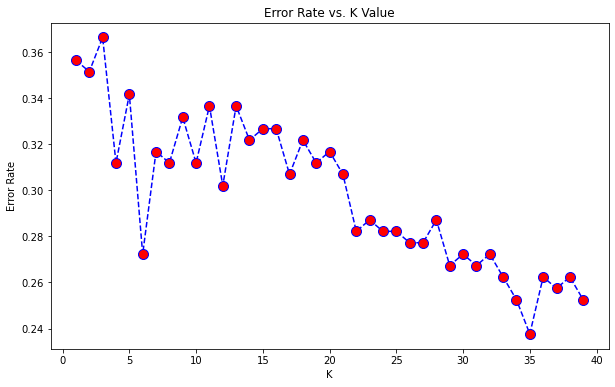

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [37]:
print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[104   9]
 [ 39  50]]


              precision    recall  f1-score   support

           0       0.73      0.92      0.81       113
           1       0.85      0.56      0.68        89

    accuracy                           0.76       202
   macro avg       0.79      0.74      0.74       202
weighted avg       0.78      0.76      0.75       202

